In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import load_boston  # 사이킷런 데이타셋

In [2]:
# Data Import

from sklearn.datasets import load_linnerud

linnerud = load_linnerud()
print(linnerud.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



In [3]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [81]:
df = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
                pd.DataFrame(linnerud.target, columns=linnerud.target_names)],
               axis=1)
df.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


In [82]:
df

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [83]:
data = df

In [84]:
# data null값 측정하기

data.isnull().sum()

Chins     0
Situps    0
Jumps     0
Weight    0
Waist     0
Pulse     0
dtype: int64

In [85]:
# train, test set 분류하기

X = data
X = X.drop(columns=['Pulse'], axis=1)
y = data['Pulse']

In [86]:
# Pulse 개수를 파악하기

data['Pulse'].value_counts()

50.0    3
52.0    3
56.0    3
62.0    2
46.0    2
54.0    2
58.0    1
60.0    1
74.0    1
64.0    1
68.0    1
Name: Pulse, dtype: int64

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [88]:
X

,Chins,Situps,Jumps,Weight,Waist
0,5.0,162.0,60.0,191.0,36.0
1,2.0,110.0,60.0,189.0,37.0
2,12.0,101.0,101.0,193.0,38.0
3,12.0,105.0,37.0,162.0,35.0
4,13.0,155.0,58.0,189.0,35.0
5,4.0,101.0,42.0,182.0,36.0
6,8.0,101.0,38.0,211.0,38.0
7,6.0,125.0,40.0,167.0,34.0
8,15.0,200.0,40.0,176.0,31.0
9,17.0,251.0,250.0,154.0,33.0


In [89]:
Y

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=uint8)

In [69]:
X.shape

(20, 5)

In [71]:
Y.shape

(20, 11)

In [90]:
import numpy as np
# 평균

mean = np.mean(X_train, axis = 0)

# 표준편차
std = np.std(X_train, axis = 0)

# 표준화값
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 5개의 입력층을 통한 Pulse 값 추정
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (5,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 64)                384       
                                                                 
 dense_60 (Dense)            (None, 32)                2080      
                                                                 
 dense_61 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [94]:
# model train
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.1401 - mse: 0.1401 - val_loss: 0.1188 - val_mse: 0.1188
Epoch 2/100
1/1 [==============================] - 0s 75ms/step - loss: 0.1055 - mse: 0.1055 - val_loss: 0.1058 - val_mse: 0.1058
Epoch 3/100
1/1 [==============================] - 0s 71ms/step - loss: 0.0924 - mse: 0.0924 - val_loss: 0.0959 - val_mse: 0.0959
Epoch 4/100
1/1 [==============================] - 0s 77ms/step - loss: 0.0882 - mse: 0.0882 - val_loss: 0.0925 - val_mse: 0.0925
Epoch 5/100
1/1 [==============================] - 0s 68ms/step - loss: 0.0862 - mse: 0.0862 - val_loss: 0.0904 - val_mse: 0.0904
Epoch 6/100
1/1 [==============================] - 0s 69ms/step - loss: 0.0852 - mse: 0.0852 - val_loss: 0.0893 - val_mse: 0.0893
Epoch 7/100
1/1 [==============================] - 0s 75ms/step - loss: 0.0845 - mse: 0.0845 - val_loss: 0.0888 - val_mse: 0.0888
Epoch 8/100
1/1 [==============================] - 0s 83ms/step - loss: 0.0840 - mse: 0.0840

1/1 [==============================] - 0s 140ms/step - loss: 0.0830 - mse: 0.0830 - val_loss: 0.0864 - val_mse: 0.0864
Epoch 64/100
1/1 [==============================] - 0s 115ms/step - loss: 0.0831 - mse: 0.0831 - val_loss: 0.0872 - val_mse: 0.0872
Epoch 65/100
1/1 [==============================] - 0s 78ms/step - loss: 0.0831 - mse: 0.0831 - val_loss: 0.0864 - val_mse: 0.0864
Epoch 66/100
1/1 [==============================] - 0s 148ms/step - loss: 0.0832 - mse: 0.0832 - val_loss: 0.0873 - val_mse: 0.0873
Epoch 67/100
1/1 [==============================] - 0s 114ms/step - loss: 0.0832 - mse: 0.0832 - val_loss: 0.0864 - val_mse: 0.0864
Epoch 68/100
1/1 [==============================] - 0s 127ms/step - loss: 0.0833 - mse: 0.0833 - val_loss: 0.0874 - val_mse: 0.0874
Epoch 69/100
1/1 [==============================] - 0s 114ms/step - loss: 0.0833 - mse: 0.0833 - val_loss: 0.0864 - val_mse: 0.0864
Epoch 70/100
1/1 [==============================] - 0s 112ms/step - loss: 0.0833 - mse: 0.

In [95]:
# model test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 49ms/step - loss: 0.0871 - mse: 0.0871


[0.0870976597070694, 0.0870976597070694]

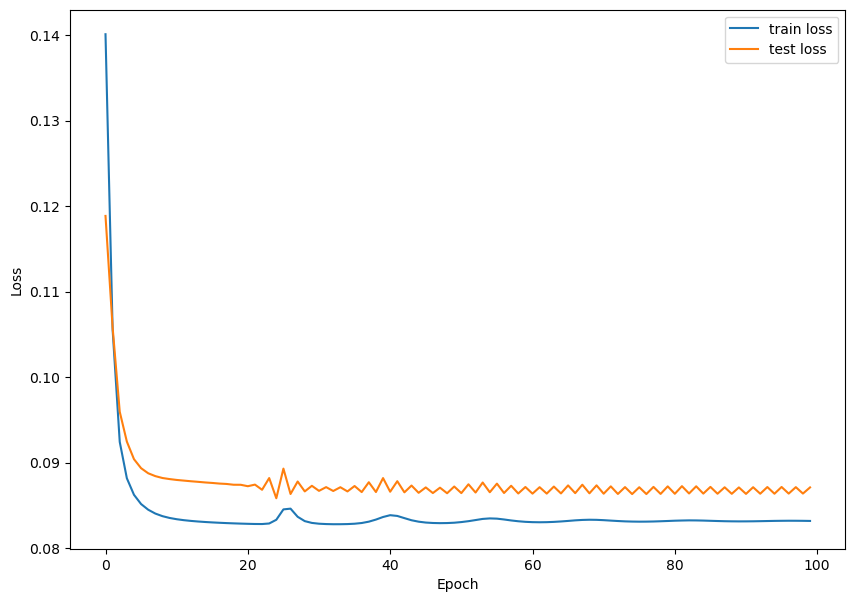

In [96]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()